# Classification with Decision Tree


In [34]:
import numpy as np
import pandas as pd
from data_treatment import DataAtts
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz # Decision tree from sklearn

import pydotplus # Decision tree plotting
from IPython.display import Image

import ipywidgets as widgets
import glob

In [35]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='Original file:',
    value = 'original_data/diabetes_escalonated.csv',
    disabled=False,
)
display(files_dropdown)



Dropdown(description='Original file:', index=3, options=('original_data/creditcard_1s_escalonated.csv', 'origi…

In [36]:
folder_name = files_dropdown.value[14:-4]
print(folder_name)
fake_directory_dropdown = widgets.Dropdown(
    options=glob.glob("fake_data/*"),
    description='Fake file:',
    disabled=False,
)
display(fake_directory_dropdown)

creditcard_escalonated


Dropdown(description='Fake file:', options=('fake_data/data', 'fake_data/data_escalonated', 'fake_data/diabete…

In [37]:
folder_name = fake_directory_dropdown.value
print(folder_name)
fake_files_dropdown = widgets.Dropdown(
    options=glob.glob(folder_name + "/*"),
    description='Fake file:',
    disabled=False,
)
display(fake_files_dropdown)

fake_data/creditcard_balanced_traing


Dropdown(description='Fake file:', options=('fake_data/creditcard_balanced_traing/id-8_epochs-1500_layer-1_lr-…

In [38]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)    
data = pd.read_csv(file_name)
print(file_name)

original_data/creditcard_escalonated.csv


In [39]:
fake_data = pd.read_csv(fake_files_dropdown.value)
#makes the outcome be 0 or 1
fake_data.loc[getattr(fake_data, dataAtts.class_name) >= 0.5, dataAtts.class_name] = 1
fake_data.loc[getattr(fake_data, dataAtts.class_name) < 0.5, dataAtts.class_name] = 0

In [40]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [41]:

fake_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [42]:
print("Original Data")
print("Outcome = 0: ", round(data[dataAtts.class_name].value_counts()[0]/len(data) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(data[dataAtts.class_name].value_counts()[1]/len(data) * 100,2), '%  of the dataset\n')


print("Fake Data")
try:
    positive=str(round(fake_data[dataAtts.class_name].value_counts()[0]/len(fake_data) * 100,2))
except:
    positive="0"
try:
    negative=str(round(fake_data[dataAtts.class_name].value_counts()[1]/len(fake_data) * 100,2))
except:
    negative="0"
    

print("Outcome = 0: ", positive, '%  of the dataset')
print("Outcome = 1: ", negative, '%  of the dataset')


Original Data
Outcome = 0:  99.83 %  of the dataset
Outcome = 1:  0.17 %  of the dataset

Fake Data
Outcome = 0:  50.0 %  of the dataset
Outcome = 1:  50.0 %  of the dataset


In [57]:
original_data_training_set = data.head(int(data.shape[0]*0.7))
fake_data_training_set  = fake_data.head(int(fake_data.shape[0]*0.7))
original_data_testing_set  = data.tail(int(data.shape[0]*0.3))
fake_data_testing_set  = fake_data.tail(int(fake_data.shape[0]*0.3))
mixed_data_training_set=pd.concat([original_data_training_set, fake_data_training_set])
mixed_data_testing_set=pd.concat([original_data_testing_set, fake_data_testing_set])

In [58]:
mask_0 = original_data_testing_set[dataAtts.class_name] == 0
mask_1 = original_data_testing_set[dataAtts.class_name] == 1
balanced_test = pd.concat([original_data_testing_set[mask_1], original_data_testing_set[mask_0].sample(original_data_testing_set[mask_1].shape[0])])

In [77]:
train = fake_data
test = balanced_test

In [78]:
trainX = train.drop(dataAtts.class_name, 1)
testX = test.drop(dataAtts.class_name, 1)
y_train = train[dataAtts.class_name]
y_test = test[dataAtts.class_name]
#trainX = pd.get_dummies(trainX)

clf1 = DT(max_depth = 3, min_samples_leaf = 1)
clf1 = clf1.fit(trainX,y_train)

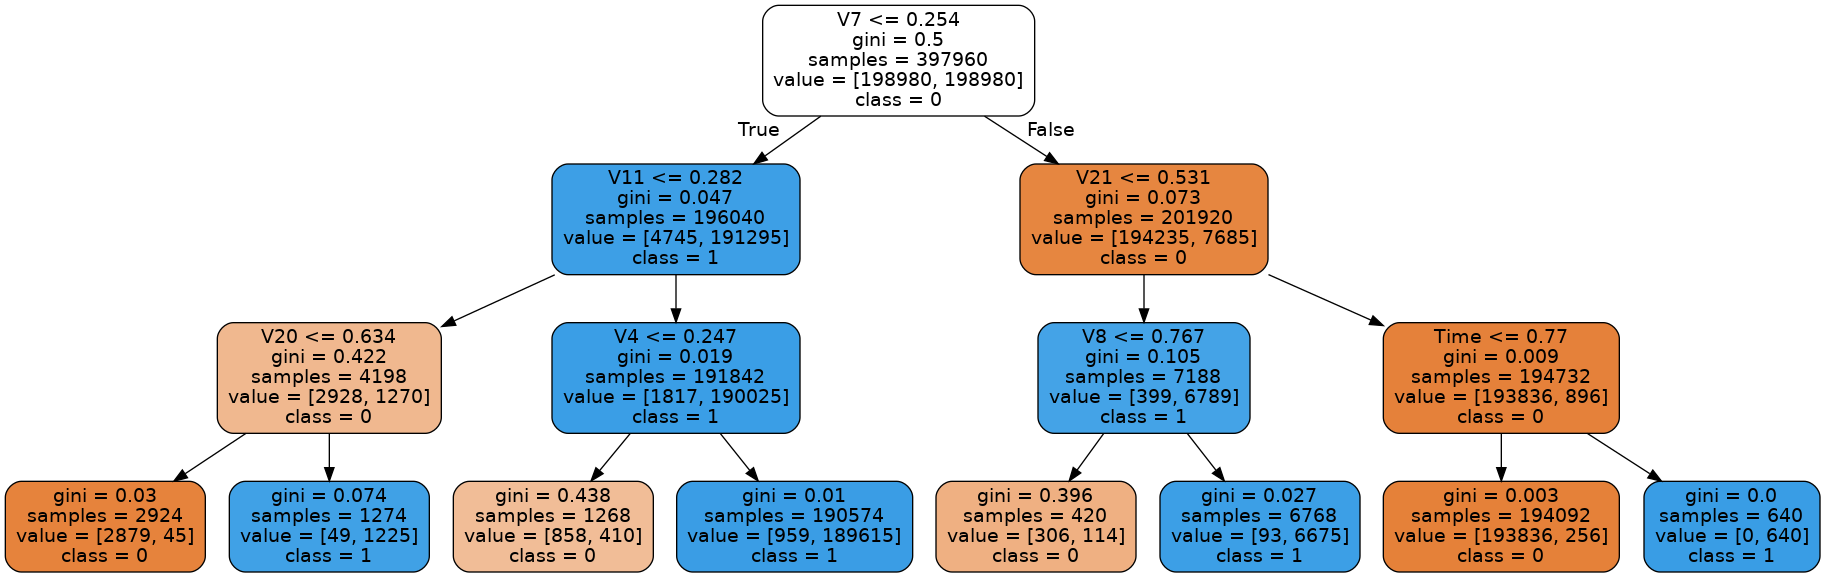

In [79]:
export_graphviz(clf1, out_file="models/tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="models/tree.dot")
Image(g.create_png())

In [80]:
pred = clf1.predict_proba(testX)

# If there is only one possible class in the training_data the tree will predict all results to be 1
# The lines below are a little hack to avoid this problem
if pred.shape[1] > 1:
    pred = np.argmax(pred, axis=1)
else:
    pred = pred.reshape((pred.shape[0]))
    if negative=="0":
        pred = pred-1

In [81]:
mse = ((pred - y_test.values)**2).mean(axis=0)
mse

0.47685185185185186

In [69]:
print("\nTest Data")
print("Outcome = 0: ", round(test[dataAtts.class_name].value_counts()[0]/len(test) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(test[dataAtts.class_name].value_counts()[1]/len(test) * 100,2), '%  of the dataset\n')


Test Data
Outcome = 0:  50.0 %  of the dataset
Outcome = 1:  50.0 %  of the dataset



In [46]:
mask_0 = test[dataAtts.class_name] == 0
mask_1 = test[dataAtts.class_name] == 1
balanced_test = pd.concat([test[mask_1], test[mask_0].sample(test[mask_1].shape[0])])

In [54]:
print("\nTest Data")
print("Outcome = 0: ", round(balanced_test[dataAtts.class_name].value_counts()[0]/len(balanced_test) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(balanced_test[dataAtts.class_name].value_counts()[1]/len(balanced_test) * 100,2), '%  of the dataset\n')


Test Data
Outcome = 0:  50.0 %  of the dataset
Outcome = 1:  50.0 %  of the dataset

